In [49]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pickle


## Exporting the data path from the files

In [50]:
data_path = Path.cwd().parent / 'data' / 'raw' / 'Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)

In [51]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [55]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
df.shape

(7043, 21)

In [57]:
df=df.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
num_cols=['tenure','MonthlyCharges','TotalCharges',]
for i in df.columns:
    if i not in num_cols:  
        print(df[i].unique())
        print('-'*20)

['Female' 'Male']
--------------------
[0 1]
--------------------
['Yes' 'No']
--------------------
['No' 'Yes']
--------------------
['No' 'Yes']
--------------------
['No phone service' 'No' 'Yes']
--------------------
['DSL' 'Fiber optic' 'No']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['Yes' 'No' 'No internet service']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['Month-to-month' 'One year' 'Two year']
--------------------
['Yes' 'No']
--------------------
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
--------------------
['No' 'Yes']
--------------------


In [59]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [61]:
df.TotalCharges=df.TotalCharges.replace(' ',0)

In [62]:
df.TotalCharges=df.TotalCharges.astype('float64')

In [63]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### cleaning overview
missing values in total charge was replaced with 0

customer id was removed 

class imbalance detected in the target


# EDA

In [64]:
df.shape

(7043, 20)

In [65]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


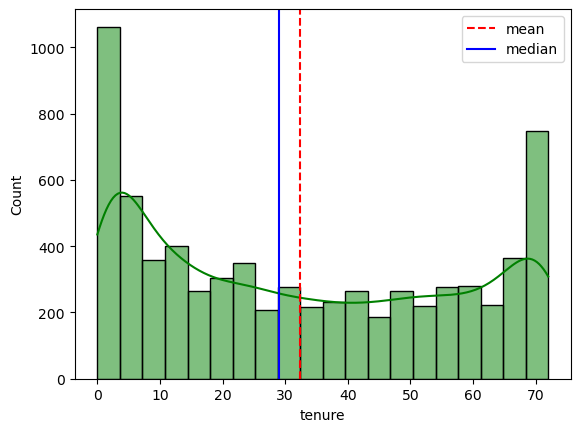

In [66]:
sns.histplot(df['tenure'],kde=True,bins=20,color='green')
mean=df['tenure'].mean()
median=df['tenure'].median()
plt.axvline([mean],color='red',linestyle='dashed',label='mean')
plt.axvline([median],color='blue',label='median')
plt.legend()

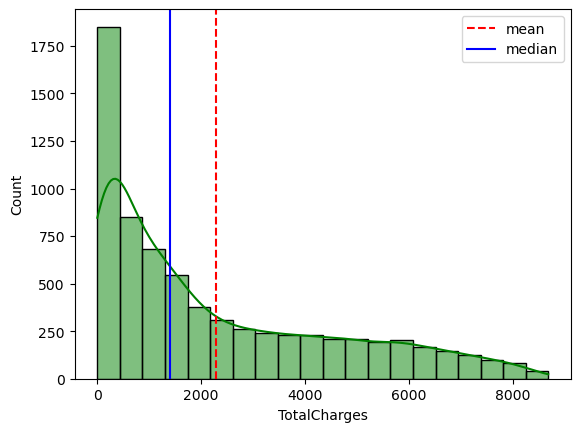

In [67]:
sns.histplot(df['TotalCharges'],kde=True,bins=20,color='green')
mean=df['TotalCharges'].mean()
median=df['TotalCharges'].median()
plt.axvline([mean],color='red',linestyle='dashed',label='mean')
plt.axvline([median],color='blue',label='median')
plt.legend()

<Axes: >

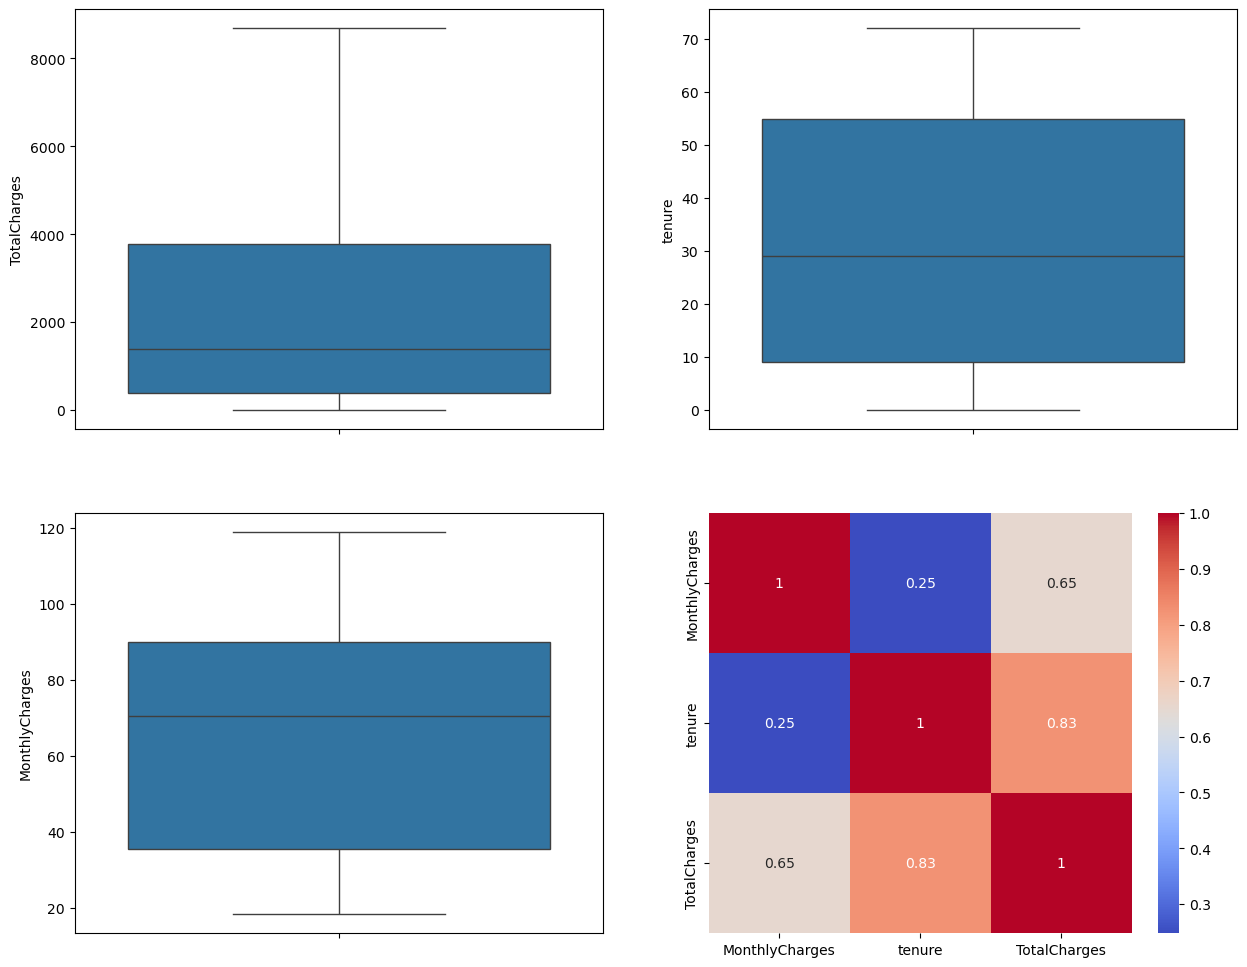

In [68]:
fig,axes = plt.subplots(2,2,figsize=(15,12))
sns.boxplot(y=df['TotalCharges'], ax=axes[0,0])
sns.boxplot(y=df['tenure'], ax=axes[0,1])
sns.boxplot(y=df['MonthlyCharges'], ax=axes[1,0])
sns.heatmap(df[['MonthlyCharges','tenure','TotalCharges']].corr(),annot=True,cmap='coolwarm',ax=axes[1,1])



In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [70]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [71]:
obj_columns=df.select_dtypes(include='object').columns.to_list()
obj_columns=obj_columns+['SeniorCitizen']

In [72]:
len(obj_columns)

17

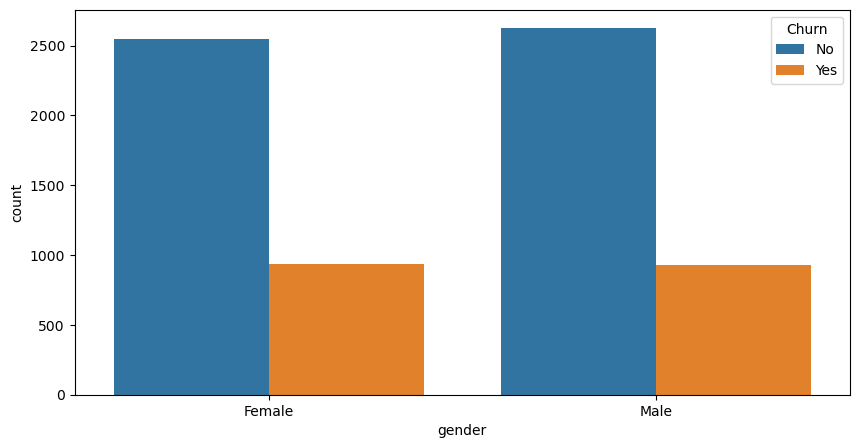

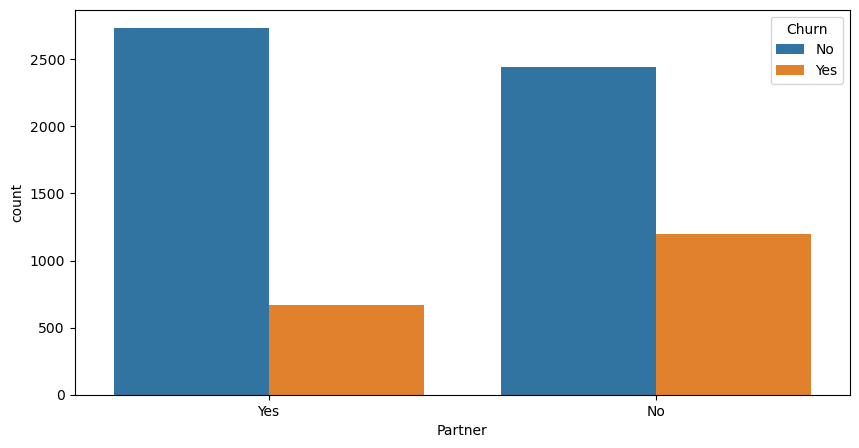

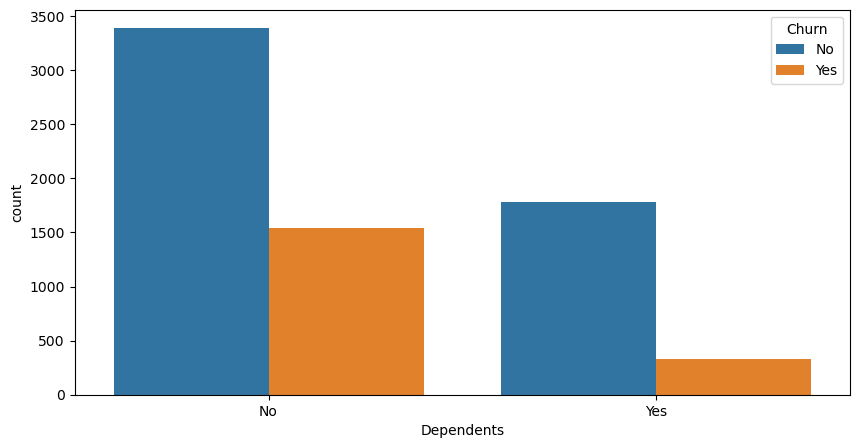

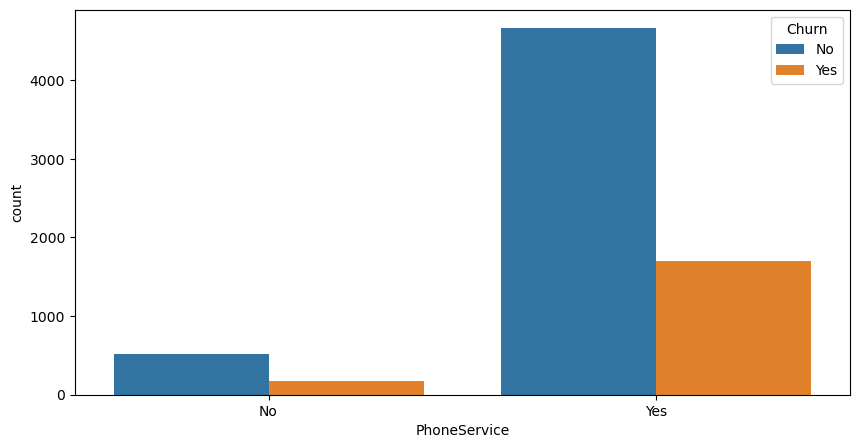

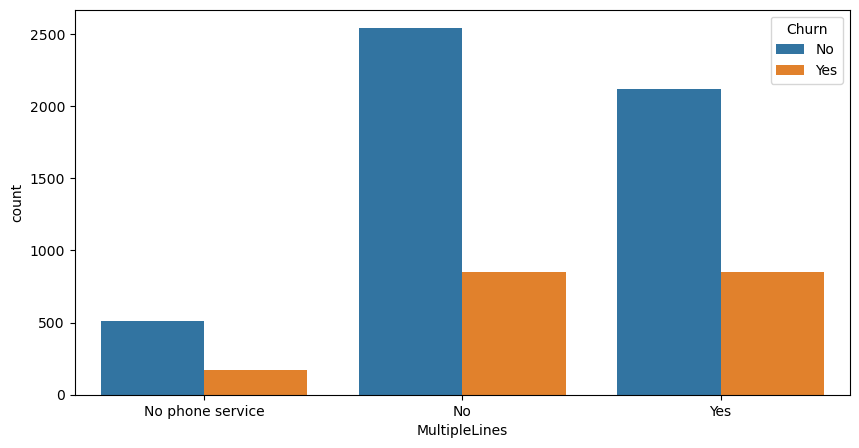

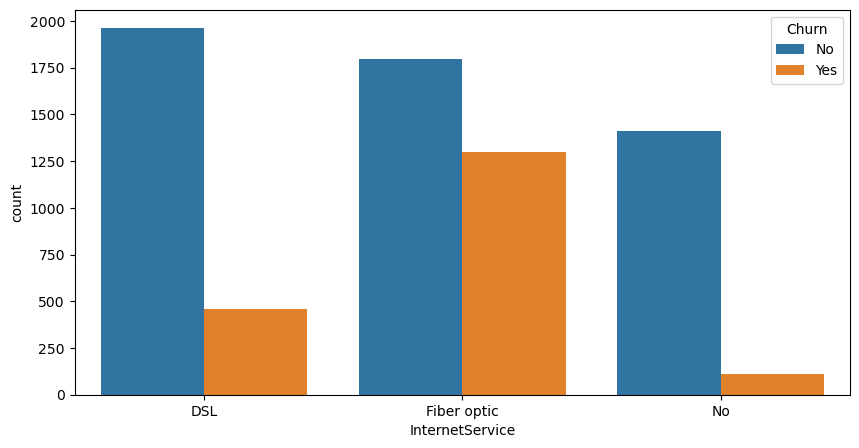

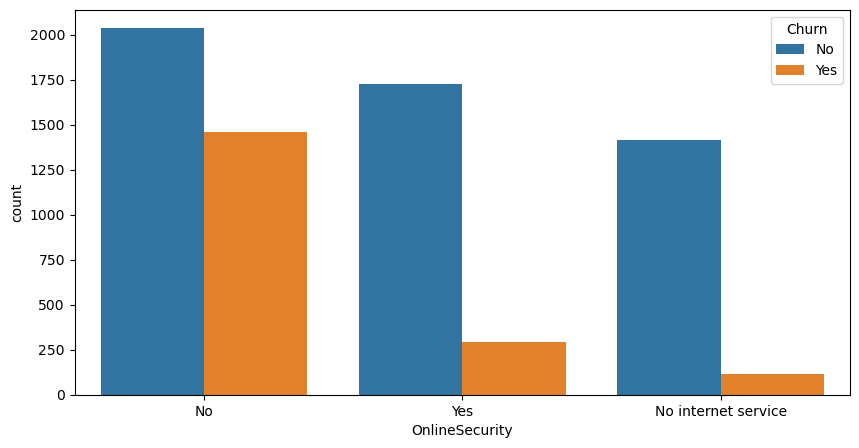

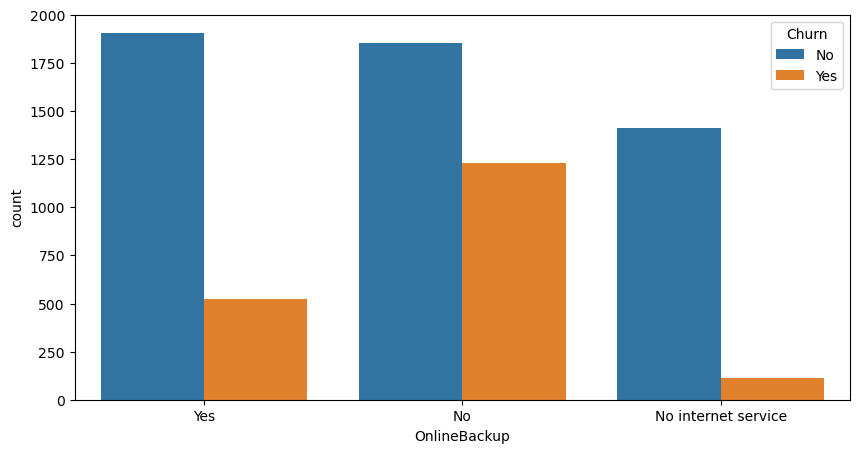

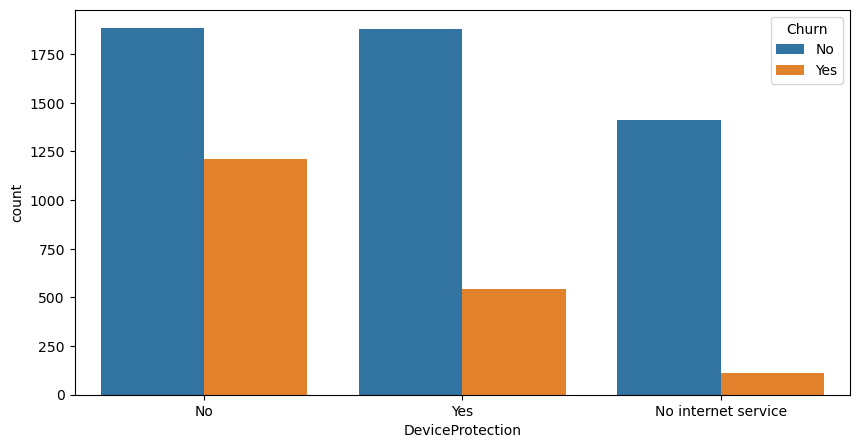

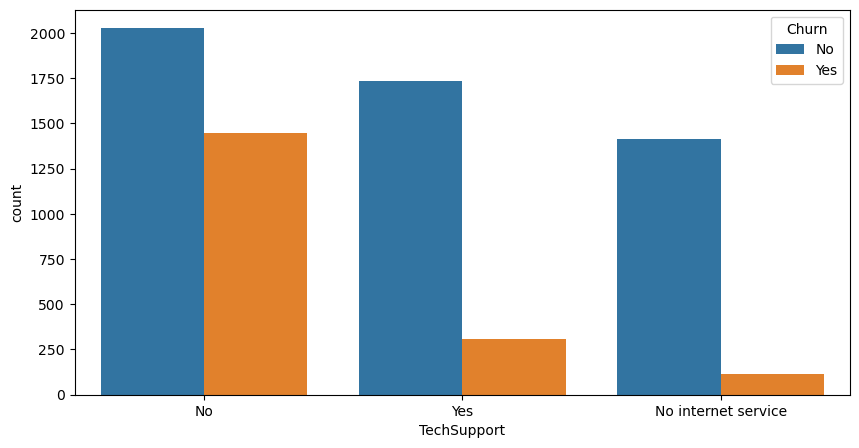

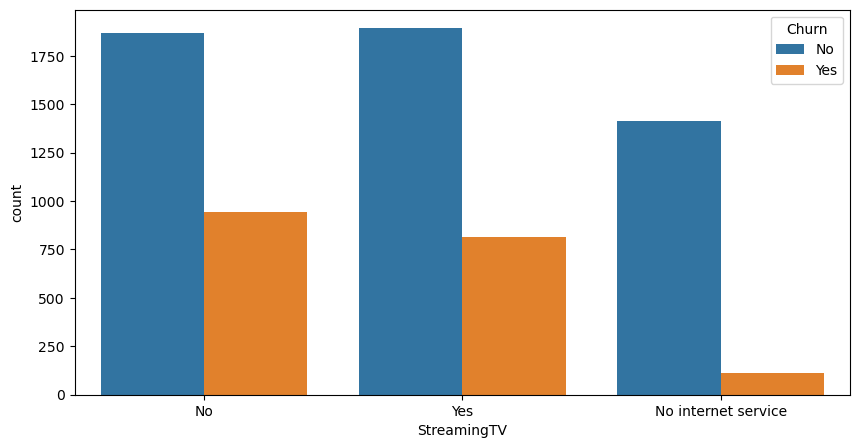

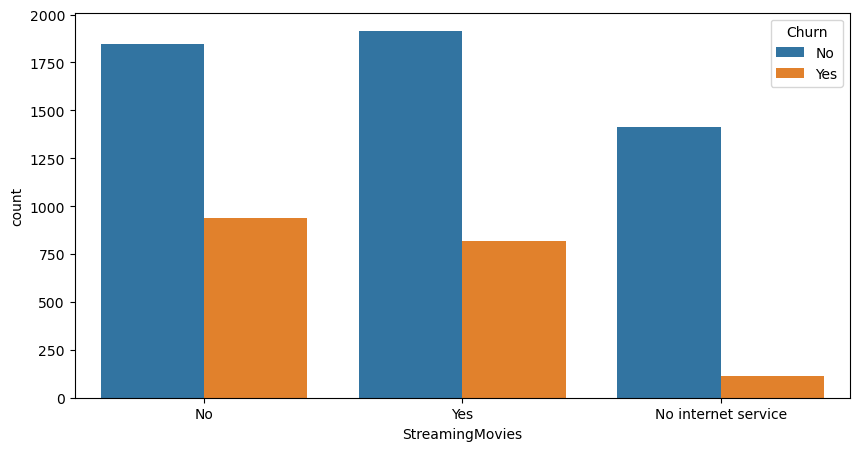

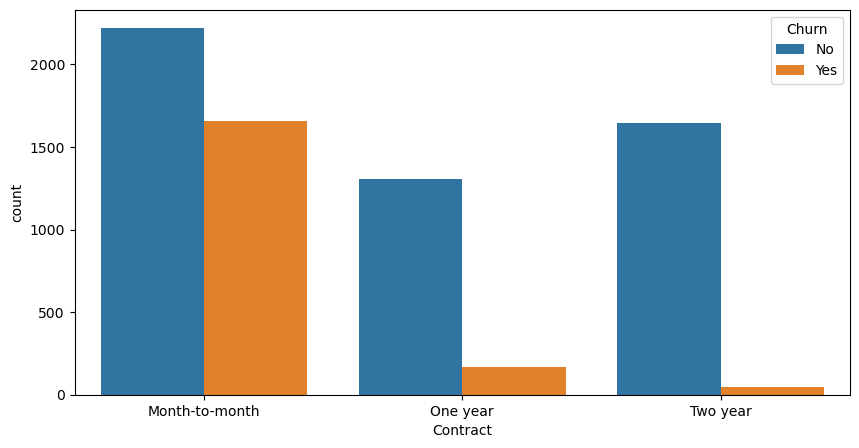

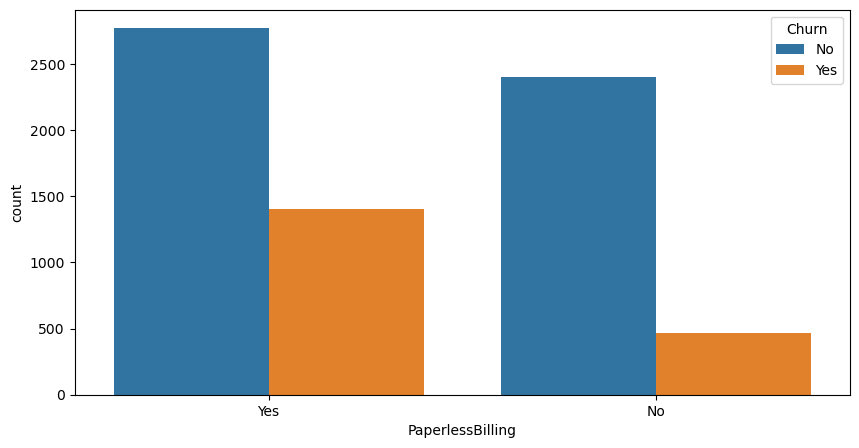

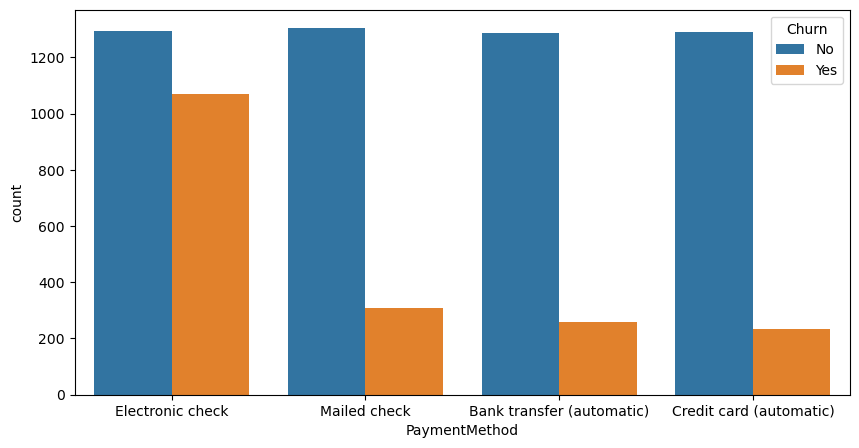

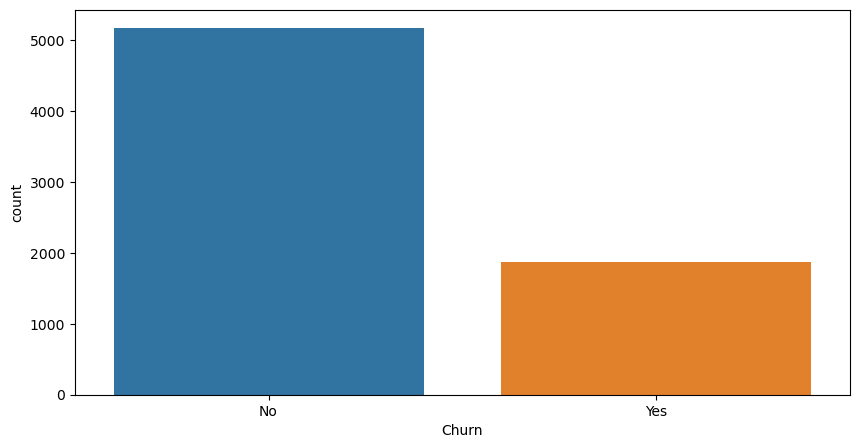

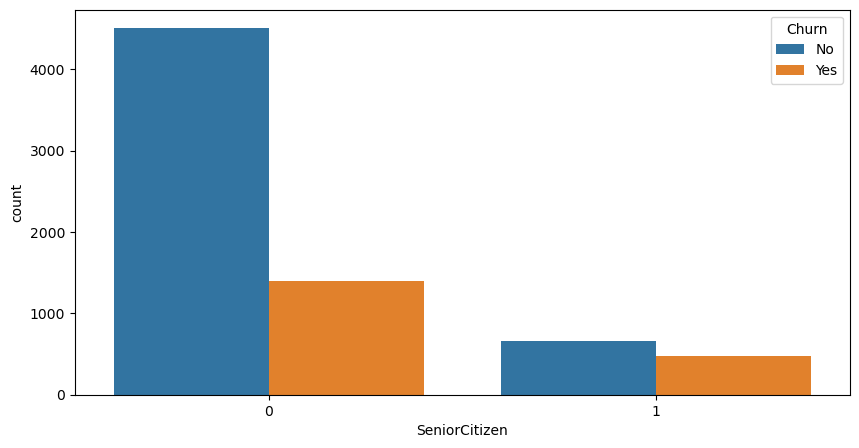

In [73]:
for i in obj_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Churn',data=df)

# Data Preprocessing

In [74]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


label encoding on categorical values


In [75]:
obj_columns=df.select_dtypes(include='object').columns.to_list()

In [76]:
encoder_col={}
for i in obj_columns:
    encoder=LabelEncoder()
    df[i]=encoder.fit_transform(df[i])
    encoder_col[i]=encoder


In [77]:
encoder_col

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [78]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


saving to processed file

In [79]:
df.gender.value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

In [80]:
path=Path.cwd().parent/'data'/'processed'
df.to_csv(path/'preprocessed.csv',index=False)

### Train and test split

In [81]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


In [83]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [84]:
smote=SMOTE(random_state=42)

In [85]:
x_train,y_train=smote.fit_resample(x_train,y_train)
y_train.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

## Model Training

In [86]:
models={
    'Logistic Regression':LogisticRegression(random_state=42,max_iter=3000),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42)
}

In [87]:
cv_scores={}
for name,model in models.items():
    print(f"Training {name}")
    scores=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores[name]=scores
    print(f"Model:{name} Cross_Validation_Accuracy: {np.mean(scores)}")
    print('-'*50)


Training Logistic Regression
Model:Logistic Regression Cross_Validation_Accuracy: 0.7929023454033306
--------------------------------------------------
Training Decision Tree
Model:Decision Tree Cross_Validation_Accuracy: 0.7809448749945268
--------------------------------------------------
Training Random Forest
Model:Random Forest Cross_Validation_Accuracy: 0.8378577579286892
--------------------------------------------------
Training XGBoost
Model:XGBoost Cross_Validation_Accuracy: 0.8312132025628676
--------------------------------------------------


In [88]:
cv_scores

{'Logistic Regression': array([0.73309179, 0.74803625, 0.82719033, 0.82054381, 0.83564955]),
 'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'Random Forest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

Random forest has higher accuracy than others

# Model Evaluation

In [89]:
model=RandomForestClassifier(random_state=42,n_estimators=100)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [90]:
y_pred=model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}")
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")

Accuracy: 0.7771469127040455
Confusion Matrix:
 [[880 156]
 [158 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



Saving the trained model

In [91]:
model_data={
    'model':model,
    'features_names':x.columns.tolist(),
    'encoder_col':encoder_col
    }
save_path=Path.cwd().parent/'models'/'Customer_Churn_Model.pkl'
with open(save_path,'wb') as f:
    pickle.dump(model_data,f)

loading the model

In [92]:
with open(save_path,'rb') as f:
    model_data=pickle.load(f)
    model=model_data['model']
    features_names=model_data['features_names']
    encoder_col=model_data['encoder_col']

In [93]:
print(model)
print(features_names)
print(encoder_col)

RandomForestClassifier(random_state=42)
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
{'gender': LabelEncoder(), 'Partner': LabelEncoder(), 'Dependents': LabelEncoder(), 'PhoneService': LabelEncoder(), 'MultipleLines': LabelEncoder(), 'InternetService': LabelEncoder(), 'OnlineSecurity': LabelEncoder(), 'OnlineBackup': LabelEncoder(), 'DeviceProtection': LabelEncoder(), 'TechSupport': LabelEncoder(), 'StreamingTV': LabelEncoder(), 'StreamingMovies': LabelEncoder(), 'Contract': LabelEncoder(), 'PaperlessBilling': LabelEncoder(), 'PaymentMethod': LabelEncoder(), 'Churn': LabelEncoder()}


input data to try our model


In [98]:
input_data={
    'gender':'Male',
    'SeniorCitizen':0,
    'Partner':'No',
    'Dependents':'No',
    'tenure':2,
    'PhoneService':'Yes',
    'MultipleLines':'No',
    'InternetService':'DSL',
    'OnlineSecurity':'Yes',
    'OnlineBackup':'Yes',
    'DeviceProtection':'No',
    'TechSupport':'No',
    'StreamingTV':'No',
    'StreamingMovies':'No',
    'Contract':'Month-to-month',
    'PaperlessBilling':'Yes',
    'PaymentMethod':'Mailed check',
    'MonthlyCharges':53.85,
    'TotalCharges':166.15
}


In [99]:
input_df=pd.DataFrame([input_data])
for column in input_df.columns:
    if column in encoder_col:
        input_df[column]=encoder_col[column].transform(input_df[column])
input_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,166.15


In [100]:
predection=model.predict(input_df)
pred_proba=model.predict_proba(input_df)
print(f"Churn Prediction:{'churn' if predection==1 else 'not churn'}")
print(f"Churn Prediction Probability:{pred_proba}")

Churn Prediction:churn
Churn Prediction Probability:[[0.35 0.65]]
